## Introduction
#### Datatset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context
- Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.  
- This dataset contains 11 features that can be used to predict possible heart disease.
- Let's train a machine learning model to assist with diagnosing this disease.

### Import necessary libraries

In [48]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

RANDOM_STATE = 55

### Load the dataset and see first 5 rows to get a basic idea about the information of data

In [32]:
# load the dataset
df = pd.read_csv('heart.csv')

In [33]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### As we can see above, the variables:

- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

Are *categorical*, so we must one-hot encode them. 

### One-hot encoding
* one-hot encoding aims to transform a categorical variable with `n` outputs into `n` binary variables.
* Pandas has a built-in method to one-hot encode variables, it is the function `pd.get_dummies`. There are several arguments to this function, but here we will use only a few. They are:

        - data: DataFrame to be used
        - prefix: A list with prefixes, so we know which value we are dealing with
        - columns: the list of columns that will be one-hot encoded. 'prefix' and 'columns' must have the same length.

In [35]:
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [36]:
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

Let's choose the variables that will be the input features of the model.
- The target is `HeartDisease`.
- All other variables are features that can potentially be used to predict the target, `HeartDisease`.

In [38]:
# storing all necessary features except HeartDisease, since it is our target
features = [x for x in df.columns if x not in 'HeartDisease'] 

In [39]:
# Before, there were 10 features, now there are 20 features
print(len(features))

20


### splitting the dataset using `train_test_split` function from scikit-learn

In [40]:
X_train, X_cv, y_train, y_cv = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

In [42]:
print(f'train samples: {len(X_train)}')
print(f'Cross-validation samples: {len(X_cv)}')

train samples: 734
Cross-validation samples: 184


## Building the Models
There are several hyperparameters in the Decision Tree object from Scikit-learn.
The hyperparameters we will use and investigate here are:

 - `min_samples_split`: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - `max_depth`: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.


In [43]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

In [49]:
# build and fit different model based on min_samples_split_list
accuracy_list_train = []
accuracy_list_cv = []

for min_samples_split in min_samples_split_list:
    # define the model
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE)
    # fit the model
    model.fit(X_train, y_train)

    #pridictions using the training set and cross-validation set
    predictions_train = model.predict(X_train)
    predictions_cv = model.predict(X_cv)

    # calculating accuracy
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_cv = accuracy_score(predictions_cv, y_cv)

    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)
    

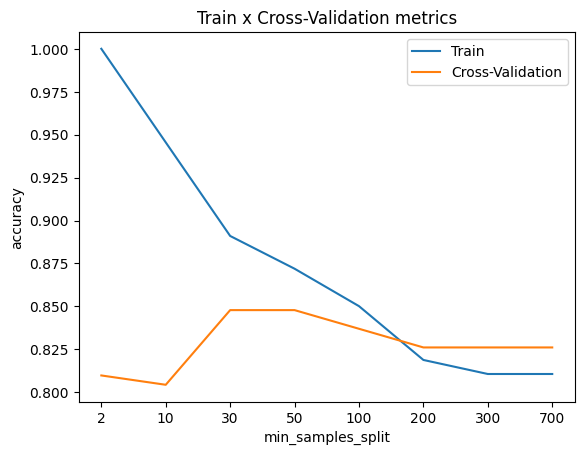

In [53]:
# plotting accuracy VS min_samples_split graph
plt.title('Train x Cross-Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Cross-Validation'])

#### Note: how increasing the number of `min_samples_split` reduces overfitting

#### Let's do the same experiment with max_depth

In [56]:
# build and fit different model based on min_samples_split_list
accuracy_list_train = []
accuracy_list_cv = []

for max_depth in max_depth_list:
    # define the model
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = RANDOM_STATE)
    # fit the model
    model.fit(X_train, y_train)

    #pridictions using the training set and cross-validation set
    predictions_train = model.predict(X_train)
    predictions_cv = model.predict(X_cv)

    # calculating accuracy
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_cv = accuracy_score(predictions_cv, y_cv)

    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

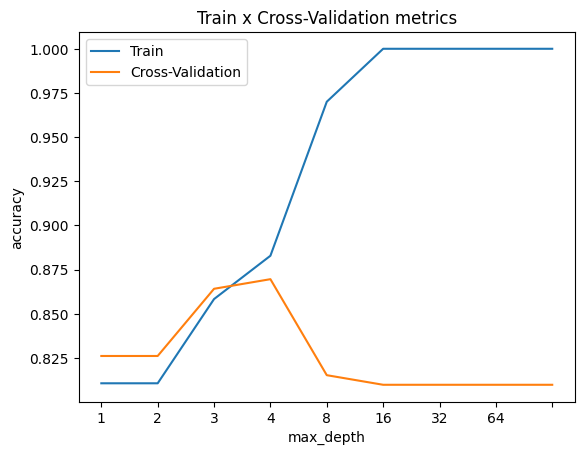

In [59]:
# plotting accuracy VS max_depth graph
plt.title('Train x Cross-Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Cross-Validation'])

#### Note: As `max_depth` increases, chances of overfitting also increases

we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 4`
- `min_samples_split = 50`

In [64]:
# defining the final model
model = DecisionTreeClassifier(min_samples_split = 50, max_depth = 4, random_state = RANDOM_STATE)
# fitting the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=55)

In [65]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(model.predict(X_cv),y_cv):.4f}")

Metrics train:
	Accuracy score: 0.8665
Metrics validation:
	Accuracy score: 0.8696


#### No sign of overfitting, even though the metrics are not that good.